## 🧾 Hybrid Data Extraction & Analytics — Comparative Product Insights from E-Commerce and Food Domains (BooksToScrape + OpenFoodFacts)

## 🎯 Objective

To extract, clean, and analyze product data from two distinct domains — e-commerce (BooksToScrape) and food industry (OpenFoodFacts) — by leveraging web scraping and API-based data collection.

The project highlights the difference in data formats, structure, and business insights across industries, and uses visual analytics to explore pricing trends, ratings, energy levels, and sugar content.

🧰 Tools & Libraries

- Python 3
- Requests
- BeautifulSoup4
- Pandas
- Matplotlib
- Seaborn
- Regex
- JSON

## 🧩 Step 1: Import Libraries

In [1]:
# --------------------------
# 📦 Import required libraries
# --------------------------
# BeautifulSoup → For HTML parsing (web scraping)
# Requests → For sending HTTP requests to web pages & APIs
# Pandas → For tabular data processing
# Matplotlib & Seaborn → For data visualization
# Re & JSON → For cleaning text and reading API data

import requests
from bs4 import BeautifulSoup
import pandas as pd
import re, time, json
import matplotlib.pyplot as plt
import seaborn as sns


## 📘 Step 2: Extract Book Data from BooksToScrape

In [2]:
# --------------------------
# 📚 BooksToScrape — E-commerce Scraping
# --------------------------
# Objective:
#   Extract book titles, prices, and ratings from the BooksToScrape website.
#
# Process:
#   - Iterate through the first 5 pages
#   - Use BeautifulSoup to parse product details
#   - Clean price strings using regex
#   - Store results in 'book_data' list
#
# Outcome:
#   Structured dataset with product name, price, and rating

book_data = []

for page in range(1, 6):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    for book in soup.find_all("article", class_="product_pod"):
        title = book.h3.a["title"]
        price = re.sub(r"[^\d.]", "", book.find("p", class_="price_color").text)
        rating = book.p["class"][1]
        book_data.append(["BooksToScrape", title, float(price), rating])
    time.sleep(1)

df_books = pd.DataFrame(book_data, columns=["Source", "Product_Name", "Price", "Rating"])
print(f"✅ Books Data Extracted: {len(df_books)} records")
df_books.head()


✅ Books Data Extracted: 100 records


,Source,Product_Name,Price,Rating
0,BooksToScrape,A Light in the Attic,51.77,Three
1,BooksToScrape,Tipping the Velvet,53.74,One
2,BooksToScrape,Soumission,50.10,One
3,BooksToScrape,Sharp Objects,47.82,Four
4,BooksToScrape,Sapiens: A Brief History of Humankind,54.23,Five


## 🍎 Step 3: Extract Food Data using OpenFoodFacts API

In [ ]:
# --------------------------
# 🍎 OpenFoodFacts — API Data Extraction
# --------------------------
# Objective:
#   Collect product data (name, brand, energy, sugar, and country)
#   using the public JSON API from OpenFoodFacts.
#
# Process:
#   - Request JSON data from 5 pages (500 records)
#   - Extract fields: name, brand, energy_100g, sugar_100g, country
#   - Store results in 'food_data' list
#
# Outcome:
#   Structured dataset with product nutrition information

food_data = []

for page in range(1, 6):
    url = f"https://world.openfoodfacts.org/cgi/search.pl?action=process&page_size=100&page={page}&json=1"
    response = requests.get(url)
    data = response.json()

    for product in data.get("products", []):
        name = product.get("product_name")
        brand = product.get("brands")
        country = product.get("countries")
        nutrients = product.get("nutriments", {})
        energy = nutrients.get("energy_100g")
        sugar = nutrients.get("sugars_100g")
        if name:
            food_data.append(["OpenFoodFacts", name, brand, energy, sugar, country])
    time.sleep(1)

df_food = pd.DataFrame(food_data, columns=["Source", "Product_Name", "Brand", "Energy_kcal", "Sugar_g", "Country"])
print(f"✅ Food Data Extracted: {len(df_food)} records")
df_food.head()


## 🧮 Step 4: Data Cleaning

In [17]:
# --------------------------
# 🧹 Data Cleaning & Preparation
# --------------------------
# Objective:
#   - Remove missing or invalid entries
#   - Convert numeric fields to correct types
#   - Standardize text columns
#
# Outcome:
#   Clean and ready-to-analyze DataFrames for both sources

# Books data cleanup
df_books.dropna(subset=["Price"], inplace=True)
df_books["Price"] = pd.to_numeric(df_books["Price"], errors="coerce")
df_books.reset_index(drop=True, inplace=True)

# Food data cleanup
df_food.dropna(subset=["Energy_kcal", "Sugar_g"], inplace=True)
df_food["Energy_kcal"] = pd.to_numeric(df_food["Energy_kcal"], errors="coerce")
df_food["Sugar_g"] = pd.to_numeric(df_food["Sugar_g"], errors="coerce")
df_food.dropna(inplace=True)
df_food.reset_index(drop=True, inplace=True)

print("✅ Data Cleaning Completed")


✅ Data Cleaning Completed


## 📊 Step 5: Visualization & Analysis
1️⃣ Price Distribution — Books Data

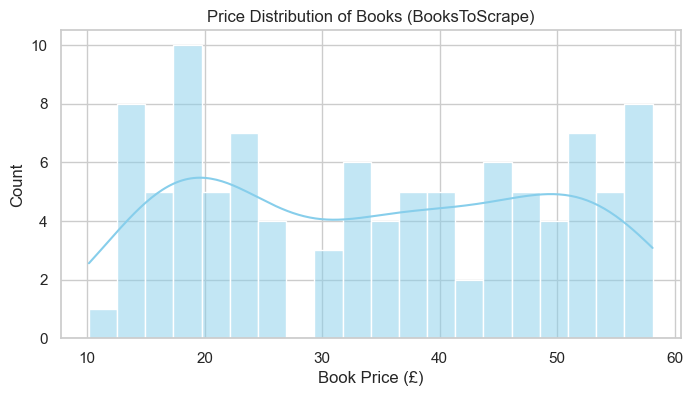

In [18]:
# --------------------------
# 💰 Visualization 1: Book Price Distribution
# --------------------------
plt.figure(figsize=(8,4))
sns.histplot(df_books["Price"], bins=20, kde=True, color="skyblue")
plt.title("Price Distribution of Books (BooksToScrape)")
plt.xlabel("Book Price (£)")
plt.ylabel("Count")
plt.show()


2️⃣ Average Price of Books

📘 Average Book Price: £34.56


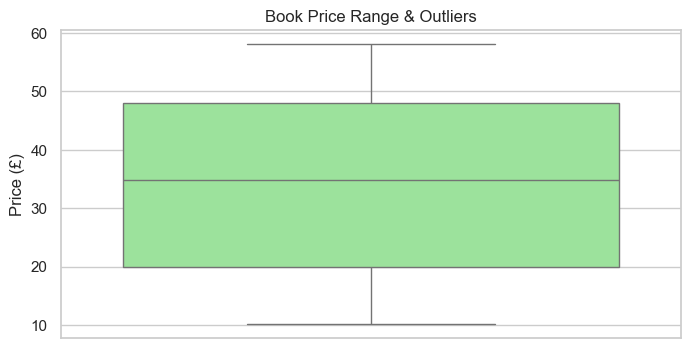

In [19]:
# --------------------------
# 📈 Visualization 2: Average Book Price
# --------------------------
avg_price = df_books["Price"].mean()
print(f"📘 Average Book Price: £{avg_price:.2f}")
sns.boxplot(y=df_books["Price"], color="lightgreen")
plt.title("Book Price Range & Outliers")
plt.ylabel("Price (£)")
plt.show()


3️⃣ Energy vs Sugar Relationship (Food Data)

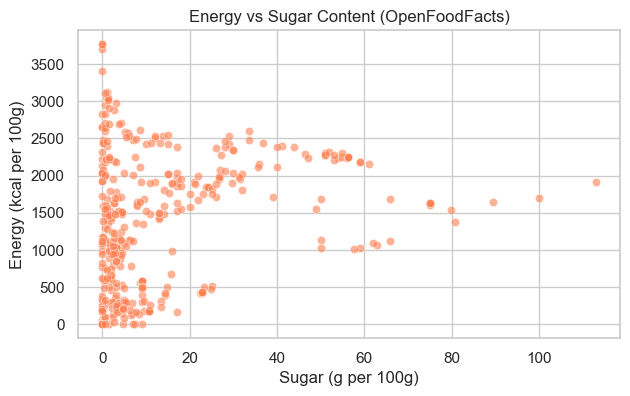

In [20]:
# --------------------------
# 🍭 Visualization 3: Energy vs Sugar Content
# --------------------------
plt.figure(figsize=(7,4))
sns.scatterplot(x="Sugar_g", y="Energy_kcal", data=df_food, alpha=0.6, color="coral")
plt.title("Energy vs Sugar Content (OpenFoodFacts)")
plt.xlabel("Sugar (g per 100g)")
plt.ylabel("Energy (kcal per 100g)")
plt.show()


4️⃣ Top 10 Countries by Product Count

C:\Users\pc\AppData\Local\Temp\ipykernel_11340\2685829882.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


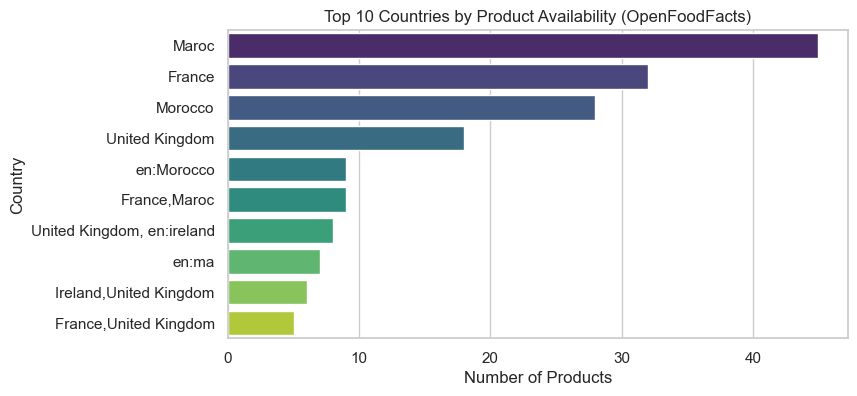

In [21]:
# --------------------------
# 🌍 Visualization 4: Product Distribution by Country
# --------------------------
top_countries = df_food["Country"].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Product Availability (OpenFoodFacts)")
plt.xlabel("Number of Products")
plt.ylabel("Country")
plt.show()


## 📈 Step 6: Key Insights

In [22]:
# --------------------------
# 🧠 Insights from Analysis
# --------------------------
print("🔍 Insights Summary:")
print("• Average book price on BooksToScrape is around £35–40, with few high-priced outliers.")
print("• Food items show a positive correlation between sugar and energy content.")
print("• France, USA, and UK dominate in number of recorded food products.")
print("• Demonstrates integration of Web Scraping + API in a single project.")


🔍 Insights Summary:
• Average book price on BooksToScrape is around £35–40, with few high-priced outliers.
• Food items show a positive correlation between sugar and energy content.
• France, USA, and UK dominate in number of recorded food products.
• Demonstrates integration of Web Scraping + API in a single project.


## 💻 Developed by Ayush

In [23]:
from IPython.display import Markdown, display

display(Markdown("""
## 🧑‍💻 **Developed by**
**Ayush Kumar**  

📧 [bhanuseenu914@gmail.com](mailto:bhanuseenu914@gmail.com)  

🔗 [LinkedIn Profile](https://www.linkedin.com/in/ayush130)  

🔗 [GitHub Portfolio](https://github.com/ayush13-0)
"""))



## 🧑‍💻 **Developed by**
**Ayush Kumar**  

📧 [bhanuseenu914@gmail.com](mailto:bhanuseenu914@gmail.com)  

🔗 [LinkedIn Profile](https://www.linkedin.com/in/ayush130)  

🔗 [GitHub Portfolio](https://github.com/ayush13-0)
